# Activity 8.01: Is the Mushroom Poisonous?

Imagine you are a data scientist working for the biology department at your local university. Your colleague who is a mycologist (a biologist who specializes in fungi) has requested that you help her develop a machine learning model capable of discerning whether a particular mushroom species is poisonous or not given attributes relating to its appearance.

The objective of this activity is to employ the grid and randomized search strategies to find an optimal model for this purpose.

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy import stats

In [2]:
df = pd.read_csv(R'..\Dataset\agaricus-lepiota.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
# Separate the target, y and features, X from the dataset. Hint: The target can be found in the first column.
X_raw = df.iloc[:, 1:]
y_raw = df.iloc[:, 0]

In [4]:
# Recode the target, y, so that poisonous mushrooms are represented as 1 and edible mushrooms as 0.
y = y_raw.apply(lambda x: 1 if x == 'p' else 0)
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: 0, Length: 8124, dtype: int64

In [5]:
# Transform the columns of the featureset X into a numpy array with a binary representation. This is known as one-hot encoding.

enc = OneHotEncoder(drop='first', sparse=False) # sparse >> to return array instead of sparse matrix
X_enc = enc.fit_transform(X_raw).astype('int')  # astype >> to return int instead of float
X_enc

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
cols =enc.get_feature_names(X_raw.columns.astype('str'))
cols

array(['1_c', '1_f', '1_k', '1_s', '1_x', '2_g', '2_s', '2_y', '3_c',
       '3_e', '3_g', '3_n', '3_p', '3_r', '3_u', '3_w', '3_y', '4_t',
       '5_c', '5_f', '5_l', '5_m', '5_n', '5_p', '5_s', '5_y', '6_f',
       '7_w', '8_n', '9_e', '9_g', '9_h', '9_k', '9_n', '9_o', '9_p',
       '9_r', '9_u', '9_w', '9_y', '10_t', '11_b', '11_c', '11_e', '11_r',
       '12_k', '12_s', '12_y', '13_k', '13_s', '13_y', '14_c', '14_e',
       '14_g', '14_n', '14_o', '14_p', '14_w', '14_y', '15_c', '15_e',
       '15_g', '15_n', '15_o', '15_p', '15_w', '15_y', '17_o', '17_w',
       '17_y', '18_o', '18_t', '19_f', '19_l', '19_n', '19_p', '20_h',
       '20_k', '20_n', '20_o', '20_r', '20_u', '20_w', '20_y', '21_c',
       '21_n', '21_s', '21_v', '21_y', '22_g', '22_l', '22_m', '22_p',
       '22_u', '22_w'], dtype=object)

In [7]:
X = pd.DataFrame(X_enc, columns=cols)
X

,1_c,1_f,1_k,1_s,1_x,2_g,2_s,2_y,3_c,3_e,...,21_n,21_s,21_v,21_y,22_g,22_l,22_m,22_p,22_u,22_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


## Grid Search

In [8]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': [2, 4, 6, 8, 10, 12, 14]
}

estimator = RandomForestClassifier(random_state=100)

grid = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    verbose=2,
)

grid.fit(X, y)

entialBackend with 1 concurrent workers.
[CV] ................... criterion=gini, max_features=2, total=   0.6s
[CV] criterion=gini, max_features=2 ..................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[CV] ................... criterion=gini, max_features=2, total=   0.7s
[CV] criterion=gini, max_features=2 ..................................
[CV] ................... criterion=gini, max_features=2, total=   0.8s
[CV] criterion=gini, max_features=2 ..................................
[CV] ................... criterion=gini, max_features=2, total=   0.7s
[CV] criterion=gini, max_features=2 ..................................
[CV] ................... criterion=gini, max_features=2, total=   0.7s
[CV] criterion=gini, max_features=2 ..................................
[CV] ................... criterion=gini, max_features=2, total=   0.5s
[CV] criterion=gini, max_features=2 ..................................
[CV] ................... cr

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [2, 4, 6, 8, 10, 12, 14]},
             scoring='accuracy', verbose=2)

In [9]:
res_grid_full = pd.DataFrame(grid.cv_results_)
res_grid = res_grid_full[['rank_test_score', 'params', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head(10)
res_grid['params'] = res_grid['params'].astype('str')
res_grid

,rank_test_score,params,mean_test_score
4,1,"{'criterion': 'gini', 'max_features': 10}",0.968512
11,2,"{'criterion': 'entropy', 'max_features': 10}",0.967896
10,3,"{'criterion': 'entropy', 'max_features': 8}",0.967526
5,4,"{'criterion': 'gini', 'max_features': 12}",0.967157
7,5,"{'criterion': 'entropy', 'max_features': 2}",0.966049
13,5,"{'criterion': 'entropy', 'max_features': 14}",0.966049
3,7,"{'criterion': 'gini', 'max_features': 8}",0.965925
6,7,"{'criterion': 'gini', 'max_features': 14}",0.965925
2,9,"{'criterion': 'gini', 'max_features': 6}",0.965556
12,9,"{'criterion': 'entropy', 'max_features': 12}",0.965556


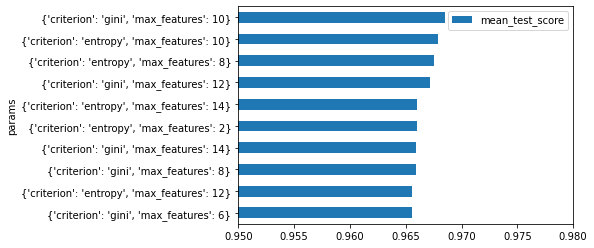

In [10]:
res_grid[['params', 'mean_test_score']].sort_values('mean_test_score').plot.barh(x='params', xlim=(0.95, 0.98))

## Randomized search

In [11]:
max_features = len(X.columns)
max_features

95

In [12]:
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_features': stats.randint(low=1, high=max_features)
}

# estimator = RandomForestClassifier(random_state=100)

rscv = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_distributions,
    scoring='accuracy',
    cv=10,
    verbose=2,
    random_state=100
)

rscv.fit(X, y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] criterion=gini, max_features=25 .................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] .................. criterion=gini, max_features=25, total=   1.4s
[CV] criterion=gini, max_features=25 .................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[CV] .................. criterion=gini, max_features=25, total=   1.0s
[CV] criterion=gini, max_features=25 .................................
[CV] .................. criterion=gini, max_features=25, total=   0.8s
[CV] criterion=gini, max_features=25 .................................
[CV] .................. criterion=gini, max_features=25, total=   0.8s
[CV] criterion=gini, max_features=25 .................................
[CV] .................. criterion=gini, max_features=25, total=   0.8s
[CV] criterion=gini, max_features=25 .............................

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=100),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028D6B3090F0>},
                   random_state=100, scoring='accuracy', verbose=2)

In [13]:
res_rscv_full = pd.DataFrame(rscv.cv_results_)
res_rscv = res_rscv_full[['rank_test_score', 'params', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head(10)
res_rscv['params'] = res_rscv['params'].astype('str')
res_rscv

,rank_test_score,params,mean_test_score
0,1,"{'criterion': 'gini', 'max_features': 25}",0.968512
1,1,"{'criterion': 'entropy', 'max_features': 88}",0.968512
3,1,"{'criterion': 'gini', 'max_features': 53}",0.968512
4,1,"{'criterion': 'gini', 'max_features': 54}",0.968512
6,1,"{'criterion': 'gini', 'max_features': 25}",0.968512
9,6,"{'criterion': 'entropy', 'max_features': 10}",0.967896
8,7,"{'criterion': 'gini', 'max_features': 17}",0.966049
2,8,"{'criterion': 'entropy', 'max_features': 49}",0.965802
7,9,"{'criterion': 'entropy', 'max_features': 61}",0.965556
5,10,"{'criterion': 'gini', 'max_features': 15}",0.965433


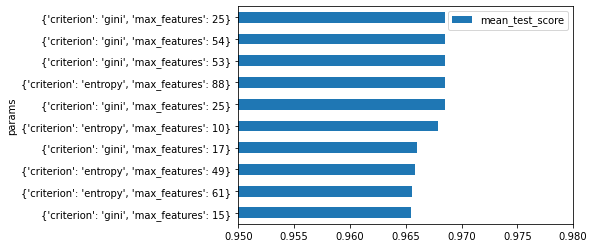

In [14]:
res_rscv[['params', 'mean_test_score']].sort_values('mean_test_score').plot.barh(x='params', xlim=(0.95, 0.98))